importing libraries and data preparation


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab as py
data = pd.read_excel('/content/qq data.xlsx')
s=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in s:
  print("Q-Q plot for ",i ,"month is :")
  sm.qqplot(data[i],line='r')
  py.show()

In [ ]:
data = pd.read_excel('/content/qq data.xlsx')
s=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data1=data
for k in s:
  for l in range(1972,2002):
    data1[k][l-1972]=np.log(data[k][l-1972])
print(data1)


    YEARS       Jan       Feb       Mar       Apr       May       Jun  \
0    1972  6.619410  6.070147  6.565726  5.418622  4.385020  3.586946   
1    1973  5.881312  5.164796  5.457946  4.879599  4.082429  3.317515   
2    1974  6.560195  5.837552  6.294097  5.792270  4.418950  3.722728   
3    1975  5.780877  6.231032  6.458389  5.325259  5.141788  3.899080   
4    1976  5.692557  5.712512  5.373687  5.109155  4.314977  3.486032   
5    1977  3.622000  3.858844  5.151127  4.195308  4.475689  3.486999   
6    1978  6.238772  6.085302  5.182530  5.420714  4.766811  3.830993   
7    1979  5.518841  5.873862  5.511287  5.229878  5.363641  3.688389   
8    1980  6.279017  5.548170  5.872312  5.315949  4.309707  3.633705   
9    1981  5.214170  5.568249  5.327936  4.950447  4.267760  4.026503   
10   1982  5.934082  6.331490  5.738680  6.336377  4.981053  3.870886   
11   1983  5.971009  6.515094  6.335067  5.562106  5.097684  3.997542   
12   1984  5.089962  5.907916  5.937452  5.470673  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for v in s:
  print("Q-Q plot for ",v ,"month is :")
  sm.qqplot(data1[v],line='s')
  py.show()

In [ ]:
import statistics 
mean=[]
st_dev =[]
for t in s:
  aa=round(statistics.mean(data1[t]),3)
  mean.append(aa)
  ab=round(statistics.pstdev(data1[t]),3)
  st_dev.append(ab)
print("list containing mean of months(from Jan to Dec) is :  ",mean)
print("list containing standard deviation of months(from Jan to Dec) is :  ",st_dev)


list containing mean of months(from Jan to Dec) is :   [5.743, 5.657, 5.639, 5.154, 4.689, 3.933, 3.21, 2.792, 2.766, 3.303, 4.821, 5.559]
list containing standard deviation of months(from Jan to Dec) is :   [0.726, 0.634, 0.557, 0.538, 0.466, 0.493, 0.259, 0.218, 0.496, 0.804, 1.162, 0.936]


In [ ]:
data2=data1
z=0
for y in s:
  for l in range(1972,2002):
    data2[y][l-1972]=(data1[y][l-1972]-mean[z])/st_dev[z]
  z=z+1
print("stochastic component of time series is=  \n",data2)


stochastic component of time series is=  
     YEARS       Jan       Feb       Mar       Apr       May       Jun  \
0    1972  1.207177  0.651652  1.663780  0.491863 -0.652318 -0.701934   
1    1973  0.190512 -0.776347 -0.325052 -0.510039 -1.301655 -1.248448   
2    1974  1.125613  0.284782  1.176117  1.186376 -0.579506 -0.426516   
3    1975  0.052173  0.905414  1.471076  0.318325  0.971647 -0.068804   
4    1976 -0.069480  0.087558 -0.476324 -0.083354 -0.802625 -0.906629   
5    1977 -2.921488 -2.836209 -0.875893 -1.781955 -0.457749 -0.904668   
6    1978  0.682882  0.675555 -0.819515  0.495751  0.166976 -0.206911   
7    1979 -0.308759  0.342053 -0.229287  0.141037  1.447728 -0.496168   
8    1980  0.738316 -0.171656  0.418873  0.301020 -0.813933 -0.607089   
9    1981 -0.728416 -0.139985 -0.558463 -0.378351 -0.903949  0.189661   
10   1982  0.263199  1.063865  0.178959  2.197727  0.626722 -0.125991   
11   1983  0.314062  1.353460  1.249671  0.758562  0.877003  0.130916   
12   198

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
for v in s:
  print("Q-Q plot for ",v ,"month is :")
  sm.qqplot(data2[v],line='s')
  py.show()



In [ ]:
from scipy.stats import pearsonr
Rk=[]
for i in range(0,12):
  if i==0 :
    corr, _ = pearsonr(data2[s[i]], data2['Dec'])
    Rk.append(round(corr,3))
  else:
    corr, _ = pearsonr(data2[s[i]], data2[s[i-1]])
    Rk.append(round(corr,3))
print("Correlation for different months[(Jan,Dec)...(Dec,Nov)] are : \n",Rk)


Correlation for different months[(Jan,Dec)...(Dec,Nov)] are : 
 [-0.086, 0.581, 0.552, 0.552, 0.406, 0.531, 0.754, 0.825, 0.108, 0.401, 0.574, 0.623]


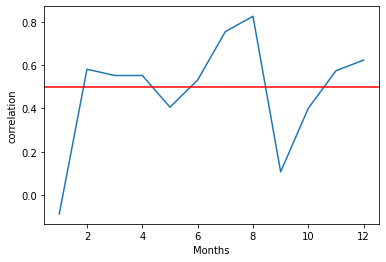

In [ ]:
import matplotlib.pyplot as plt
k=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(k,Rk)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.xlabel("Months")
plt.ylabel("correlation")
plt.show()

In [ ]:
import statsmodels.api as sm
r1=[]
for i in range(1972,2002):
  for j in s:
    a1=data2[j][i-1972]
    r1.append(a1)
k1=sm.tsa.acf(r1)  
print("value of auto correlation for lag 1 is = ",k1[1])
print("value of auto correlation for lag 2 is =",k1[2])

value of auto correlation for lag 1 is =  0.541292507817773
value of auto correlation for lag 2 is = 0.3368211451360829


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Q-Q plot for modelled stochastic component using AR(1) process is : 


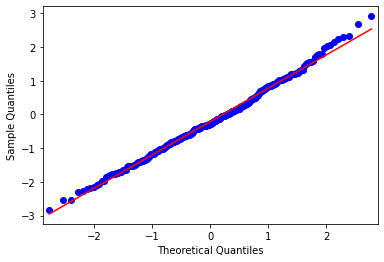

Q-Q plot for modelled stochastic component of observed series is : 


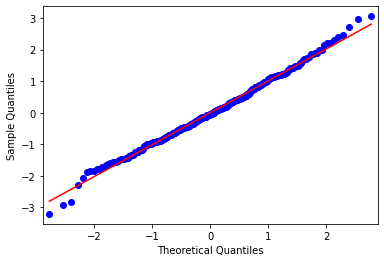

In [ ]:
import statsmodels.api as sm
import pylab as py
phi1=0.5413
st=(0.7069)**(0.5)
nn=[0]
rv=[]
for i in range(0,len(r1)):
  g=np.random.normal(0,st)
  rv.append(g)
  c1=(phi1*nn[i])+g
  nn.append(c1)
del nn[0]
zz=np.asarray(nn)
print("Q-Q plot for modelled stochastic component using AR(1) process is : ")
sm.qqplot(zz,line='r')
py.show()
print("Q-Q plot for modelled stochastic component of observed series is : ")
r2 = np.asarray(r1)
sm.qqplot(r2,line='r')
py.show()

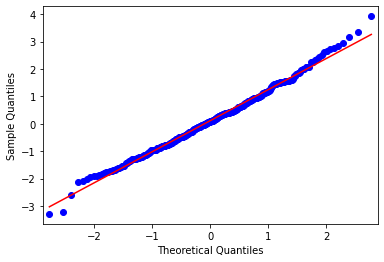

In [ ]:
ll=[]
for i in range(0,len(r1)):
  v1=r1[i]-nn[i]+rv[i]
  ll.append(v1)
ll1=np.asarray(ll)
sm.qqplot(ll1,line='r')
py.show()

In [ ]:
import math
b9=[]
b=0
c=0
for s in range(1972,2002):
  if (s%4)=0:
    while(c<=365):
      if c<=30:
        v1=math.exp((nn[b]*st_dev[0])+mean[0])
        b9.append(v1)
      elif c<=59:
        v1=math.exp((nn[b]*st_dev[1])+mean[1])
        b9.append(v1)
      elif c<=90 :
        v1=math.exp((nn[b]*st_dev[2])+mean[2])
        b9.append(v1)
      elif c<=120:
        v1=math.exp((nn[b]*st_dev[3])+mean[3])
        b9.append(v1)
      elif c<=150:
        v1=math.exp((nn[b]*st_dev[4])+mean[4])
        b9.append(v1)
      elif c<= 180:
        v1=math.exp((nn[b]*st_dev[5])+mean[5])
        b9.append






Q-Q plot for modelled stochastic component using ARMA(1,1) process is : 


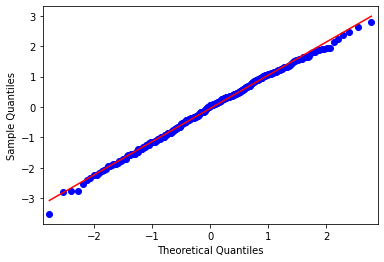

Q-Q plot for modelled stochastic component of observed series is : 


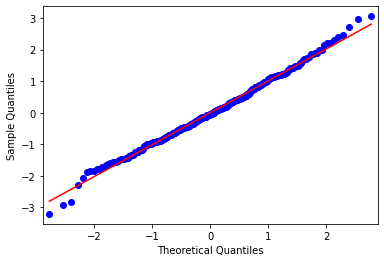

In [ ]:
phi1=0.6222
theta1=0.1866
st=(0.8304)**(0.5)
Zt=[0]
Rs=[0]
for i in range(0,len(r1)):
  x1=np.random.normal(0,st)
  Rs.append(x1)
  x2=(phi1*Zt[i])+x1-(theta1*Rs[i])
  Zt.append(x2)
Zt1=np.asarray(Zt)
print("Q-Q plot for modelled stochastic component using ARMA(1,1) process is : ")
sm.qqplot(Zt1,line='r')
py.show()
print("Q-Q plot for modelled stochastic component of observed series is : ")
r2 = np.asarray(r1)
sm.qqplot(r2,line='r')
py.show()

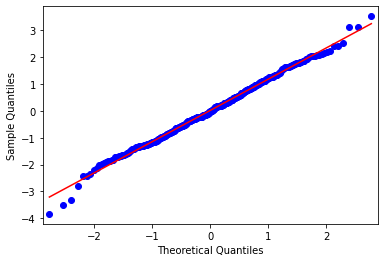

In [ ]:
ss=[]
for i in range(0,len(r1)):
  v2=r1[i]-Zt[i+1]+Rs[i+1]
  ss.append(v2)
ss1=np.asarray(ss)
sm.qqplot(ss1,line='r')
py.show()

In [ ]:
Zt1=[0]
for i in range(0,len(r1)):
  m1=r1[i]-(0.6222*Zt1[i])
  Zt1.append(m1)
del Zt1[0]
k10=sm.tsa.acf(Zt1)  
print("lag 1 auto correlation for updated sequence (r1') is = ",k10[1])
c6=round(statistics.pstdev(Zt1),3)
print("variance of updated sequence = ",(c6)**2)


lag 1 auto correlation for updated sequence (r1') is =  -0.18028661289616305
variance of updated sequence =  0.8593290000000001


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [ ]:
c=np.mean(r1)
d=statistics.pstdev(r1)
print(d)

1.000094896404958


In [ ]:
from scipy.optimize import fsolve
def fun(p):
  x,y=p    # x for standard deviation of residuals and y for theta1
  return((x-((c6)**2/(1+(y)**2))),(y+(((c6)**2*(-0.1803))/x)))
x, y =  fsolve(fun, (0.8593, 0.1802))
print("value of variance of residuals = ",x,"\n value of theta 1 is = ",y)

value of variance of residuals =  0.8304214123503741 
 value of theta 1 is =  0.18657637724137352


In [ ]:
import sympy
from sympy import Symbol, solve, nsolve

x = Symbol('x')
y = Symbol('y')
eq1=x-(1/(1+(y)**2))
eq2=y+(0.5413/x)
k=nsolve((eq1,eq2),(x,y),0.5413))
print(k)

100 year sequence generation 

In [ ]:
import numpy as np
m=2.5*(10)**10
phi1=-0.5
theta1=-0.5
sig =(((0.5*m)**2*(1-phi1**2))/(1+(theta1)**2-(2*theta1*phi1)))**(0.5)
E=[0]
a=[0]
v=[]
for i in range(1,101):
  b=np.random.normal(0,sig)
  E.append(b)
  j=phi1*a[i-1]+E[i]-(theta1*E[i-1])
  a.append(j)
  c=m+a[i]
  v.append(c)
print("100 years sequence is : \n",v)




100 years sequence is : 
 [7730800314.215408, 20409571202.044254, 26253832580.30436, 35201166451.33368, 40549003133.18943, 28584327037.988995, 25436103609.477562, 38574830077.50349, 25753604660.58342, 21128406315.89645, 25038834823.674385, 19646838539.008347, 21169811743.438248, 22565131232.725567, 26242126971.286465, 19983127452.405792, 12021970477.508131, 22187392162.797195, 35061798155.91965, 34136213013.856747, 16074126587.088118, 25137314060.277203, 35409664917.43734, 42433364250.01327, 12654446499.994648, 27377064236.466366, 19106223038.637825, 18792989303.793427, 23730887047.842533, 41740411180.83734, 27868811072.487816, 22266193018.37863, 43285808830.92638, 19570113934.45528, 25908051518.31082, 48333918860.465195, 22487167864.88188, 32672941332.106525, 21564057400.32974, 37180177466.88815, 26831788547.766045, 26835602025.692142, 20947153667.76381, 18486589926.0438, 29544033128.741882, 15369933577.223524, 16934147522.50003, 24136650772.753883, 37190908455.44341, 28451667498.7212

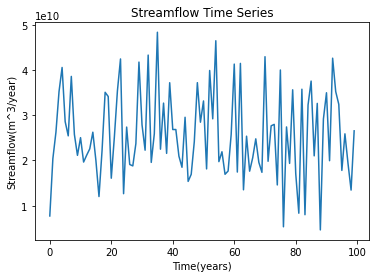

In [ ]:
import matplotlib.pyplot as plt
plt.plot(v)
plt.xlabel("Time(years)")
plt.ylabel("Streamflow(m^3/year)")
plt.title("Streamflow Time Series")
plt.show()

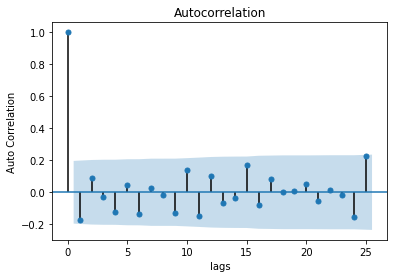

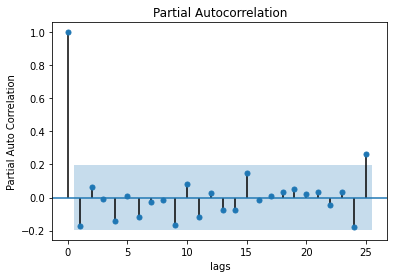

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(v,lags=25)
plt.xlabel("lags")
plt.ylabel("Auto Correlation")
plt.show()
plot_pacf(v,lags=25)
plt.xlabel("lags")
plt.ylabel("Partial Auto Correlation")
plt.show()

wet and dry spells comparison

In [ ]:
m=2.5*(10)**10
phi1=-0.5
theta1=-0.5
sig =(((0.5*m)**2*(1-phi1**2))/(1+(theta1)**2-(2*theta1*phi1)))**(0.5)
E=[0]
a=[0]
v=[]
for i in range(1,101):
  b=np.random.normal(0,sig)
  E.append(b)
  j=phi1*a[i-1]+E[i]-(theta1*E[i-1])
  a.append(j)
  c=m+a[i]
  v.append(c)
droughts=[]
years=[]
severity=[]
for j in range(0,100):
  kk=v[j]-m
  if kk<0:
    droughts.append(kk)
    years.append(j)
x=len(years)
dd=[]    # creating list of drought duration
c=1
mm=droughts[0]
for m in range(1,x):
  if (years[m]==(years[m-1]+1)):
    c=c+1
    mm=mm+droughts[m]
  else:
    dd.append(c)
    severity.append(mm)
    c=1
    mm=droughts[m]
print("maximum duration of drought is = ",max(dd), "years")
print("We will design reservoir for most severe drought which is = ",min(severity)," m^3")




maximum duration of drought is =  6 years
We will design reservoir for most severe drought which is =  -84942768588.23865  m^3


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/precip data.csv')
a=[] # list to contain state values as 0 and 1
for i in range(0,len(data['PRCP'])):
  if (data['PRCP'][i]/10)<=1:
    a.append(0)
  else:
    a.append(1)
print(a)
print(type(data["DATE"][6]))


[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
6%3

0

In [ ]:
b=[]
c,d=0,365
for i in range(1901,1969):
  if (i%4)==0:
    for j in range(c+152,c+182):
      b.append(a[j])
    c=d
    d=d+366
  else:
    for j in range(c+151,c+181):
      b.append(a[j])
    c=d
    d=d+365
print(b)








In [ ]:
c=[]
from datetime import date, timedelta
for i in range(1901,1903):
  start_date = date(i, 5, 1)
  end_date = date(i, 5, 30)
  delta = timedelta(days=1)
  while start_date <= end_date:
    k5=data.index[data.sent.str.match(start_date.strftime("%d-%m-%Y"))]
    c.append(k5)
    start_date += delta
print(c)


In [ ]:
import pandas as pd
df=pd.read_csv('/content/precip data.csv')
b=[]
i=15902  # index of first element of june month
while df['months'][i]==9:
  b.append(df['PRCP1'][i]/10)
  i=i+1
print(len(b))
for j in range(0,len(b)):
  if b[j]<=1:
    b[j]=0
  else:
    b[j]=1
print(b)
n00,n01,n10,n11=0,0,0,0
for k in range(0,len(b)-1):
  if b[k]==0 and b[k+1]==0 :
    n00=n00+1
  elif b[k]==0 and b[k+1]==1 :
    n01=n01+1
  elif b[k]==1 and b[k+1]==0 :
    n10=n10+1
  else:
    n11=n11+1
p00=n00/(n01+n00)
p01=n01/(n01+n00)
p10=n10/(n10+n11)
p11=n11/(n10+n11)
kk=[[p00,p01],[p10,p11]]
print("transition probability matrix for June month is : \n",kk)

1979
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
import numpy as np
b1=[0]
for l in range(1,1000):
  a3=np.random.uniform(0.0,1.0,1)
  if b1[l-1]==0 :
    if a3<=kk[0][0]:
      b1.append(0)
    else:
      b1.append(1)
  else:
    if a3<=kk[1][0]:
      b1.append(0)
    else :
      b1.append(1)
print(b1)
print(len(b1))


[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 

In [ ]:
dry=[]
wet=[]
count_dry=1
count_wet=0
count_dry1=0
count_wet1=1
if b1[0]==0 :
  for i in range(0,999):
    if b1[i+1]==0:
      wet.append(count_wet)
      count_dry += 1
      count_wet=0
    else:
      dry.append(count_dry)
      count_wet += 1
      count_dry=0
else:
  for i in range(0,1000):
    if b1[i+1]==0:
      wet.append(count_wet1)
      count_dry1 += 1
      count_wet1=0
    else:
      dry.append(count_dry1)
      count_wet1 += 1
      count_dry1=0
print("max dry period length for simulated sequence is =",max(dry))
print("max wet period length for simulated sequence is = ", max(wet))




max dry period length for simulated sequence is = 45
max wet period length for simulated sequence is =  8


In [ ]:
dry=[]
wet=[]
count_dry=1
count_wet=0
count_dry1=0
count_wet1=1
if b[0]==0 :
  for i in range(0,len(b)-1):
    if b[i+1]==0:
      wet.append(count_wet)
      count_dry += 1
      count_wet=0
    else:
      dry.append(count_dry)
      count_wet += 1
      count_dry=0
else:
  for i in range(0,len(b)-1):
    if b[i+1]==0:
      wet.append(count_wet1)
      count_dry1 += 1
      count_wet1=0
    else:
      dry.append(count_dry1)
      count_wet1 += 1
      count_dry1=0
print("max dry day length for observed sequence is =",max(dry))
print("max wet period length for observed sequence is = ", max(wet))


max dry day length for observed sequence is = 98
max wet period length for observed sequence is =  7
